In [1]:
# Importar liberias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Convertir a pesos
df = pd.read_csv('weight-height.csv')[['Height', 'Weight', 'Gender']].sample(50).reset_index()
df['Height'] = np.round(df.Height * 2.54) / 100
df['Weight'] = np.round(df.Weight * 0.453592)

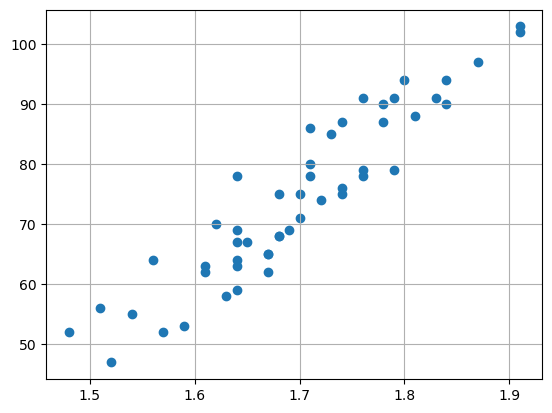

In [4]:
# Grafique peso vs altura
plt.scatter(df.Height, df.Weight)
plt.grid()

# Llega alguien de 1.7 metros  ¿cuanto peso tiene?

Idea 1: centimetros = peso


In [11]:
# Crea una columna de centimetros, altura * 100 - 100 
df['centimeters']=df.Height * 100 - 100
df

,index,Height,Weight,Gender,centimetros,centimeters
0,9418,1.67,62.0,Female,67.0,67.0
1,4009,1.78,87.0,Male,78.0,78.0
2,6433,1.71,78.0,Female,71.0,71.0
3,2649,1.91,103.0,Male,91.0,91.0
4,8077,1.56,64.0,Female,56.0,56.0
5,1644,1.64,78.0,Male,64.0,64.0
6,8506,1.65,67.0,Female,65.0,65.0
7,9063,1.64,69.0,Female,64.0,64.0
8,5181,1.64,59.0,Female,64.0,64.0
9,2569,1.74,87.0,Male,74.0,74.0


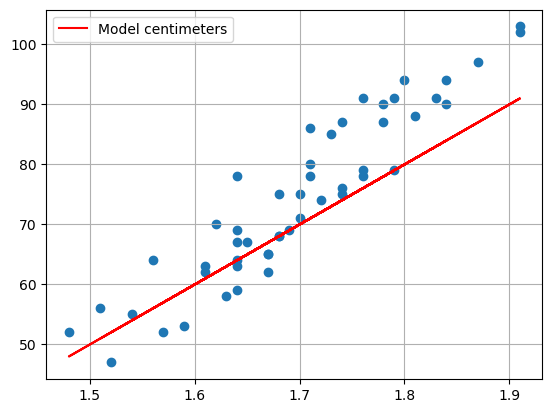

In [12]:
# Grafique el modelo
# Grafique peso vs altura
plt.scatter(df.Height, df.Weight)
plt.plot(df.Height, df.centimeters, c='red', label='Model centimeters')
plt.legend()
plt.grid()

### ¿Qué tan bueno es mi modelo? Saquemos el error

In [16]:
# Error
np.std(df.Weight - df.centimeters)

5.93686786108635

In [17]:
error_cuadratico = np.var(df.Weight - df.centimeters)

In [19]:
# error usando el promedio
error_promedio = np.var(df.Weight - df.Weight.mean())

In [20]:
# Es 81% mejor al promedio
(error_promedio - error_cuadratico)/error_promedio

0.8185255665669869

La intuición de esta métrica es --> que tan mejor es mi modelo a si simplemente no tengo modelo y uso el promedio

$$R^2 = \frac{ErrorPromedio - ErrorModelo}{ErrorPromedio} $$

In [9]:
# Usa Sklearn


## ¿Podemos mejorar este modelo? Si podemos, un método sencillo es calcular una regresión lineal


$$h(x) = \theta_0 + \theta_1 * x $$



$$J(\theta)  ={\frac{1}{2} \sum (h(x) - y)^2} $$

$$\frac{\partial }{\partial \theta_i} J(\theta)  = \frac{\partial }{\partial \theta_i} \frac{1}{2}(h(x) - y)^2$$


Reptir hasta converger {
$$ \theta_i  := \theta_i - \alpha * \frac{\partial }{\partial \theta_i} J(\theta) $$

}



Ya con el gradiente calculado tenemos  {
$$ \theta_i  := \theta_i - \alpha * (h(x) - y) * x_i $$

}



In [21]:
def cost_function(X, y, theta):
    m = len(y) 
    
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J

In [22]:
def gradient_descent(X, y, theta, alpha, iterations):

    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history
     

In [23]:
# Agrega la columna de intercepto 
X_df = df[['Height']]
X_df['intercept'] = 1
y_df = df[['Weight']]

alpha = 0.1

## Transforma a numpy los arrays
X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([40, 40])
m = len(X_df)

C:\Users\luism\AppData\Local\Temp\ipykernel_19320\130210434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['intercept'] = 1


$$Weight = 40 + 40 X $$

In [24]:
(t, c) = gradient_descent(X,y,theta, 0.5, 1500)

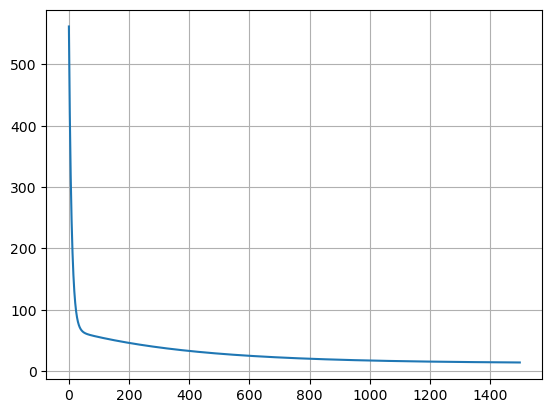

In [25]:
# Grafique el costo por iteración 
plt.plot(c)
plt.grid()

In [26]:
# ¿Cómo quedo el modelo?
t

array([ 115.3146747 , -121.49544336])

Escriba la formula
$$Weight = \theta_0 + \theta_1 *altura$$

$$Weight = -121 + 115*altura$$


In [12]:
# Prediga usando el modelo


### Ejemplo, Alguien mide 1.7 metros de altura ... ¿cuanto pesa?

In [27]:
# Grafique el modelo y comparelo con los otros
-121 + 115 * 1.7

74.5

In [28]:
# Mide 1.95
-121 + 115 * 1.95

103.25

In [29]:
# Error del segundo modelo
df['modelo2']=-121 + 115*df.Height
df.head()

,index,Height,Weight,Gender,centimetros,centimeters,modelo2
0,9418,1.67,62.0,Female,67.0,67.0,71.05
1,4009,1.78,87.0,Male,78.0,78.0,83.70
2,6433,1.71,78.0,Female,71.0,71.0,75.65
3,2649,1.91,103.0,Male,91.0,91.0,98.65
4,8077,1.56,64.0,Female,56.0,56.0,58.40


In [30]:
np.std(df.Weight - df.modelo2)

5.313755733941859

In [31]:
np.std(df.Weight - df.centimeters)

5.93686786108635

In [32]:
# Calcula el R2 del segundo modelo 
error_cuadratico_mod2 = np.var(df.Weight - df.modelo2)
(error_promedio-error_cuadratico_mod2)/error_promedio

0.854620270370462

In [16]:
# Error cuadratico medio del segundo modelo con sklearn 


# Ahora usa sklearn para calcular la regresión lineal

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
X = df[['Height']]
y = df[['Weight']]

In [36]:
model = LinearRegression().fit(X, y)

In [37]:
model.coef_

array([[131.44262295]])

In [38]:
model.intercept_

array([-148.94957377])

**Escriba la ecuación del modelo**

$$Peso = -148.94 + 134.44 * Altura$$

$$y = \beta_0 + \beta_1 * X $$

In [40]:
df['sklearn_model1']=model.predict(X)

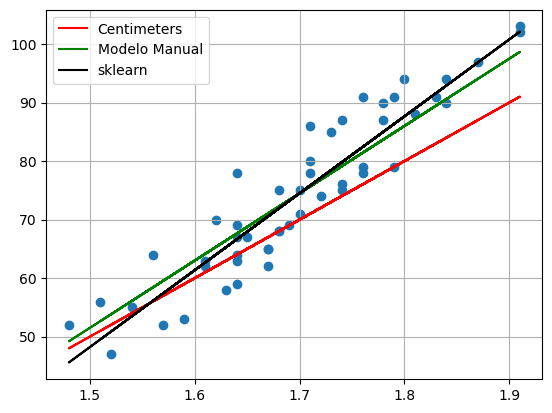

In [46]:
# Grafique el modelo y comparelo con los otros
plt.scatter(df.Height, df.Weight)
plt.plot(df.Height, df.centimeters, c='red', label='Centimeters')
plt.plot(df.Height, df.modelo2, c='green', label='Modelo Manual')
plt.plot(df.Height, df.sklearn_model1, c='black', label='sklearn')
plt.legend()
plt.grid()

# Ahora usa sklearn para regresión lineal multiple 

$$h(x) = \theta_0 + \theta_1 * x $$
$$Peso = \theta_0 + \theta_1 * altura $$


In [47]:
# Crea una columna dummy para el genero 
df['is_male'] = df.Gender == 'Male'
df.head()

,index,Height,Weight,Gender,centimetros,centimeters,modelo2,sklearn_model1,is_male
0,9418,1.67,62.0,Female,67.0,67.0,71.05,70.559607,False
1,4009,1.78,87.0,Male,78.0,78.0,83.70,85.018295,True
2,6433,1.71,78.0,Female,71.0,71.0,75.65,75.817311,False
3,2649,1.91,103.0,Male,91.0,91.0,98.65,102.105836,True
4,8077,1.56,64.0,Female,56.0,56.0,58.40,56.100918,False


In [48]:
X = df[['is_male', 'Height']]
y = df[['Weight']]

In [49]:
model = LinearRegression().fit(X, y)

In [50]:
model.intercept_

array([-112.54631553])

In [51]:
model.coef_

array([[  6.77138778, 107.7705173 ]])

$$PesoHombre = 6 + 107 * altura$$
$$PesoMujer = 107 * altura$$

In [19]:
# Coeficiente


Escriba el modelo


$$Weight = -94 + 9.43 * isMale + 97*altura $$


In [52]:
# Prediga el modelo
df['modelo_multiple'] = model.predict(X)

In [53]:
# Error del modelo
np.std(df.Weight - df.modelo_multiple)

4.446192554742398

In [54]:
# Crea una lista con colores
c = ['red' if i == 'Male' else 'blue' for i in df.Gender]

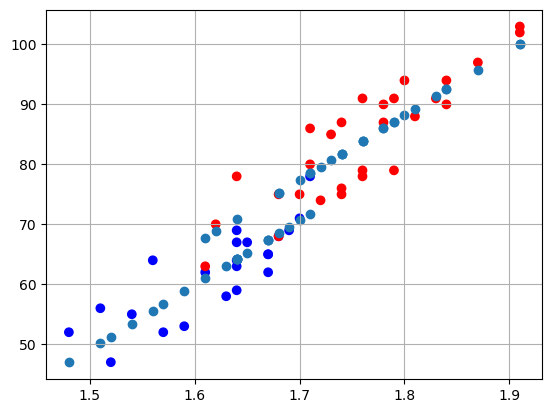

In [59]:
# Grafique los modelos
plt.scatter(df.Height, df.Weight, c=c)
plt.scatter(df.Height, df.modelo_multiple)

plt.grid()

In [60]:
# Alguien mide 1.7, ¿cuanto pesa?
df.head()

,index,Height,Weight,Gender,centimetros,centimeters,modelo2,sklearn_model1,is_male,modelo_multiple
0,9418,1.67,62.0,Female,67.0,67.0,71.05,70.559607,False,67.430448
1,4009,1.78,87.0,Male,78.0,78.0,83.70,85.018295,True,86.056593
2,6433,1.71,78.0,Female,71.0,71.0,75.65,75.817311,False,71.741269
3,2649,1.91,103.0,Male,91.0,91.0,98.65,102.105836,True,100.066760
4,8077,1.56,64.0,Female,56.0,56.0,58.40,56.100918,False,55.575691


In [44]:
# Compare error de los 3 modelos